In [1]:
from imagegrains import data_loader, grainsizing, plotting, gsd_uncertainty
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load the scaled results

In [2]:
PATH = 'F:/demo/'
#find results in folder for 'fh_pred'
fh_pred_gsds = data_loader.load_grain_set(PATH,gsd_str='fh_pred_grains_re_scaled')
#find results in folder for label masks
gt_mask_gsds = data_loader.load_grain_set(PATH,gsd_str='mask_grains_re_scaled')

## Calculate the grain size disdtributions (GSD)

In [3]:
#specify column name for axis
column_name='ell: b-axis (mm)'
#load results and get gsd for each image for a specific axis column
fh_gsd_l,fh_id_l = grainsizing.gsd_for_set(fh_pred_gsds,column=column_name)
#do the same for label masks
gt_gsd_l,gt_id_l = grainsizing.gsd_for_set(gt_mask_gsds,column=column_name)

### Plot the GSDs

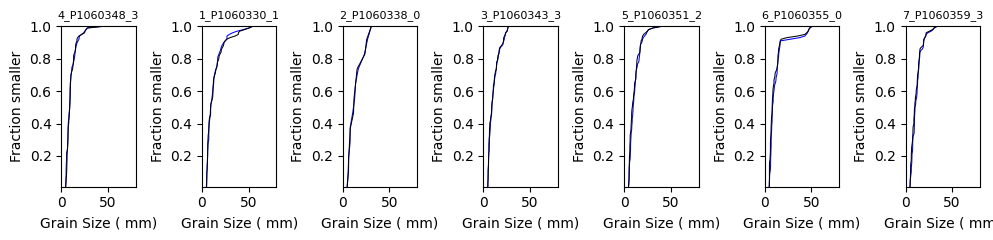

In [4]:
plt.figure(figsize=(10,2.5))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])

## Calculate percentile uncertainties

In [5]:
#number of iterations for randomization
num_it  = 1000

In [9]:
# Percentile uncertainty with bootstrapping (counting statistics only)
res_dict_bs = gsd_uncertainty.dataset_uncertainty(gsds=fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=',',gsd_id = fh_id_l)
# Percentile uncertainty with Monte Carlo (counting statistics & scale, length uncertainty)
res_dict_MC = gsd_uncertainty.dataset_uncertainty(fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=',',gsd_id = fh_id_l)

MC: 100%|██████████| 7/7 [02:10<00:00, 18.58s/gsd]


In [10]:
# Estimate uncertainty for ground truth 
res_dict_gt_bs = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=',',gsd_id = gt_id_l)
res_dict_gt_MC = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=',',gsd_id = gt_id_l)

MC: 100%|██████████| 7/7 [02:13<00:00, 19.04s/gsd]


### Compare uncertainty methods

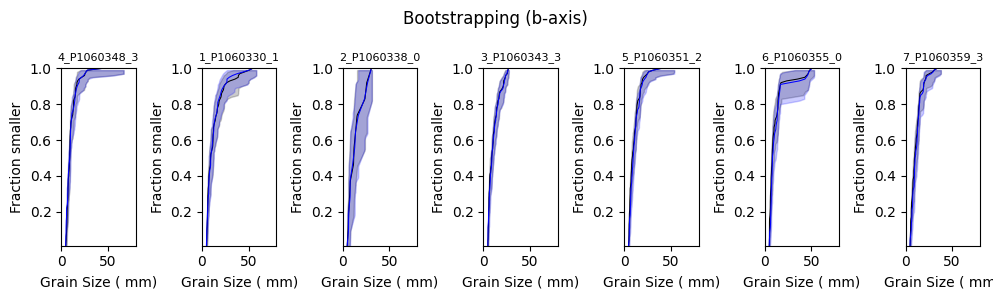

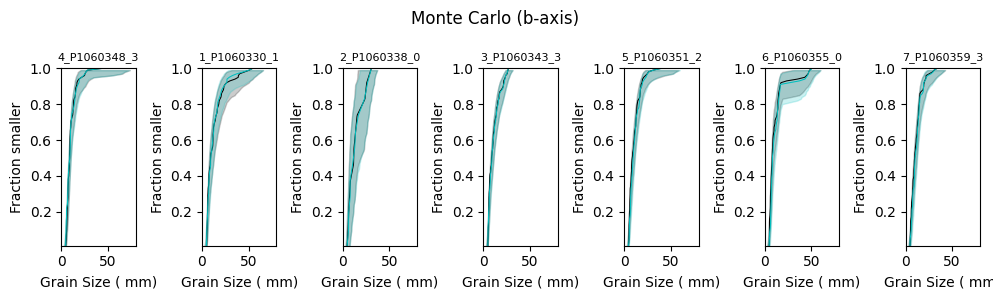

In [11]:
plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_bs[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_bs[fh_id_l[i]],color='b')
    plt.suptitle('Bootstrapping (b-axis)')

plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_MC[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='c',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_MC[fh_id_l[i]],color='c')
    plt.suptitle('Monte Carlo (b-axis)')

## Calculate grain size statistics for each image

In [16]:
summary_df = grainsizing.summary_statistics(fh_pred_gsds,fh_id_l,res_dict=res_dict_bs,data_id='fh_demo')
summary_df.head()

,Image/Masks,number of grains,D16,CI D16 (95%),D50,CI D50 (95%),D84,CI D84 (95%),D96,CI D96 (95%),unit,axis,method,grain approximation
0,4_P1060348_3_fh_pred_grains_re_scaled,58,5.5,[5.2 6.7],9.2,[7.4 9.9],15.0,[11.3 19.2],25.3,[17.1 56.2],mm,b-axis,bootstrapping,ellipse
1,1_P1060330_1_fh_pred_grains_re_scaled,46,5.8,[5.1 6.5],9.5,[ 7.3 12.7],19.7,[14. 26.9],37.8,[21.4 58.4],mm,b-axis,bootstrapping,ellipse
2,2_P1060338_0_fh_pred_grains_re_scaled,12,6.4,[ 4.8 11.1],11.8,[ 7.2 20.1],24.2,[13.1 31.2],29.2,[16.7 31.2],mm,b-axis,bootstrapping,ellipse
3,3_P1060343_3_fh_pred_grains_re_scaled,77,5.4,[5. 6.2],9.2,[ 7.6 11.1],17.3,[14.2 22.3],25.2,[21.3 26.6],mm,b-axis,bootstrapping,ellipse
4,5_P1060351_2_fh_pred_grains_re_scaled,67,5.8,[5.5 7. ],9.8,[ 8.6 11.7],17.0,[13.7 20.2],25.1,[19.4 41. ],mm,b-axis,bootstrapping,ellipse
